In [47]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [48]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [64]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [50]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [51]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [52]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [53]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [54]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Inspect the table attributes

In [69]:
inspector = inspect(engine)

In [70]:
inspector.get_table_names()

['measurement', 'station']

In [71]:
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


# Exploratory Precipitation Analysis

In [55]:
# Find the most recent date in the data set.
max_date = session.query(measurement.date).\
    order_by(measurement.date.desc()).first()
max_date

('2017-08-23')

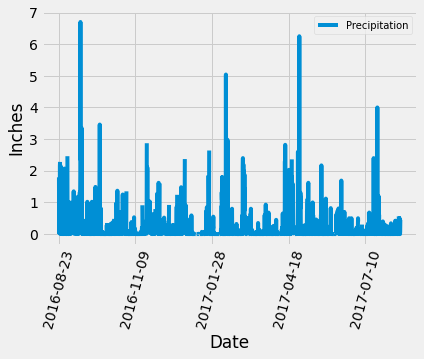

In [200]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database.
start_date = dt.date(2017,8,23)

# Calculate the date one year from the last date in data set.
days_in_year = dt.timedelta(365)
end_date = start_date - days_in_year
# print(end_date)

# Perform a query to retrieve the data and precipitation scores
precipitation_query = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date.between('2016-08-23', '2017-08-23'))

# Save the query results as a Pandas DataFrame and set the index to the date column
rain_in_year = pd.DataFrame(precipitation_query).set_index('date')

# Sort the dataframe by date
sorted_rain_in_year = rain_in_year.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data
sorted_rain_in_year.plot()
plt.legend(["Precipitation"], loc= "upper right", prop={'size': 10})
plt.xlabel("Date")
plt.ylabel("Inches")
plt.xticks(rotation=75)
plt.show()


In [ ]:
fig, ax = plt.subplots()
ypos = range(1, len(scores)+1)
ax.barh(ypos, scores[::-1])
ax.set_xlabel("score")
ax.set_ylabel("emoji")
ax.set_yticks(ypos)
ax.set_yticklabels(emoji_id[::-1])
ax.set_title("Emoji Scores")
fig.tight_layout()
plt.show()

In [146]:
# Use Pandas to calcualte the summary statistics for the precipitation data
sorted_rain_in_year.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()